In [2]:
# prompt: generate python code with deepface library to find the matching between two faces

!pip install deepface



Comparing Images: 100%|██████████| 7/7 [00:19<00:00,  2.72s/it]


Comparison Results:
          Image  Distance
0     tesla.jpg  0.522172
1    tesla2.jpg  0.789485
2  teslaold.jpg  0.849897
3   albert2.jpg  0.866858
4   alebert.jpg  0.912917
5   albert3.jpg  0.935448
6   albert4.jpg  0.941765
Most similar image: tesla.jpg


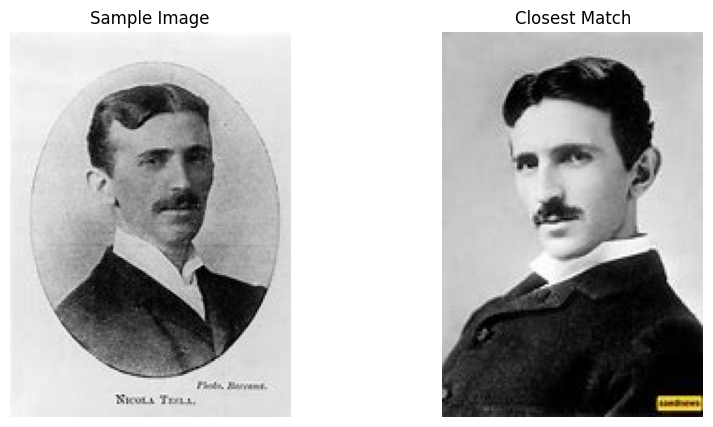

In [5]:
import os
import pandas as pd
from deepface import DeepFace
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm  # Import tqdm for the progress bar

def compare_images(sample_image_path, images_folder_path):
    # Load the sample image
    sample_image = Image.open(sample_image_path)

    # Create a DataFrame to store results
    results = []

    # List all images in the folder
    image_files = [f for f in os.listdir(images_folder_path) if os.path.isfile(os.path.join(images_folder_path, f))]

    # Initialize tqdm for the progress bar
    for image_name in tqdm(image_files, desc="Comparing Images"):
        image_path = os.path.join(images_folder_path, image_name)
        try:
            # Compare the sample image with the current image
            result = DeepFace.represent(img_path=image_path, model_name='VGG-Face', enforce_detection=False)
            distance = DeepFace.verify(img1_path=sample_image_path, img2_path=image_path, model_name='VGG-Face', enforce_detection=False)['distance']

            # Append results to the DataFrame
            results.append({'Image': image_name, 'Distance': distance})

        except Exception as e:
            print(f"Error processing image {image_name}: {e}")

    # Create a DataFrame from the results
    df = pd.DataFrame(results)

    # Sort DataFrame by distance
    df_sorted = df.sort_values(by='Distance').reset_index(drop=True)

    # Display the results
    print("Comparison Results:")
    print(df_sorted)

    # Display the most similar image
    if not df_sorted.empty:
        closest_image = df_sorted.iloc[0]['Image']
        closest_image_path = os.path.join(images_folder_path, closest_image)
        print(f"Most similar image: {closest_image}")

        # Display the input and closest images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.title("Sample Image")
        plt.imshow(sample_image)
        plt.axis('off')

        closest_image = Image.open(closest_image_path)
        plt.subplot(1, 2, 2)
        plt.title("Closest Match")
        plt.imshow(closest_image)
        plt.axis('off')

        plt.show()

# Example usage
sample_image_path = '/testtesla.jpg'
images_folder_path = '/albert'

compare_images(sample_image_path, images_folder_path)


progress bar

ddd

In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=6995e5eebc33ba6491bb72646e3c536d207a0e28a2706bf82faa5938aa693b35
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import os
from deepface import DeepFace
from tqdm import tqdm  # for progress bar

def find_best_match(known_faces, unknown_face_path, model_name='VGG-Face', distance_metric='cosine'):
    """
    Find the best match for the unknown face among the known faces based on face recognition
    using deepface library.
    """
    best_match = None
    min_distance = float('inf')

    # Initialize progress bar
    progress_bar = tqdm(total=len(known_faces), desc='Matching Progress', position=0)

    for celeb_name, celeb_path in known_faces.items():
        result = DeepFace.verify(img2_path=celeb_path,img1_path= unknown_face_path, model_name=model_name, distance_metric=distance_metric)
        distance = result["distance"]

        if distance < min_distance:
            min_distance = distance
            best_match = celeb_name

        progress_bar.update(1)

    # Close progress bar
    progress_bar.close()

    return best_match, min_distance

def main():
    # Directory where celebrity images (known faces) are stored
    known_faces_dir = '/anupam'
    known_faces = {}

    # Load the known images (celebrities) from the 'anupam' folder
    for filename in os.listdir(known_faces_dir):
        celeb_name = os.path.splitext(filename)[0]
        celeb_path = os.path.join(known_faces_dir, filename)
        known_faces[celeb_name] = celeb_path

    # Load the unknown image (friend's photo)
    unknown_image_path = '/anup.jpeg'

    # Find the best match
    best_match, min_distance = find_best_match(known_faces, unknown_image_path)

    # Display the result
    if best_match is not None:
        print(f"Best match found: {best_match} (Distance: {min_distance})")
    else:
        print("No match found.")

if __name__ == "__main__":
    main()



Matching Progress:  23%|██▎       | 6/26 [00:12<00:42,  2.13s/it]

ValueError: Exception while processing img2_path